In [15]:
# Importing the Necessary Library

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Loading Data
df = pd.read_csv('/content/drive/MyDrive/AI_WORKSPACE/Student_Performance_Analysis/Datasets/Student_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,KEC,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4.0,3.0,4,1,1,3,4,11
1,KEC,F,17,U,GT3,T,1,1,at_home,NaN,...,yes,no,5.0,3.0,3,1,1,3,2,11
2,KEC,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,NaN,NaN,2,2,3,3,6,12
3,KEC,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3.0,2.0,2,1,1,5,0,14
4,KEC,F,16,U,GT3,T,3,3,NaN,other,...,no,no,NaN,3.0,2,1,2,5,0,13


In [18]:
# Visualizations of shape of the data
df.shape

(649, 31)

In [19]:
# Vision over a columns in a datasets
list(df.columns)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G3']

In [20]:
# Handing Missing Values
# Finding the missing columns
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,2
Fjob,3


In [21]:
# Listing the categorical and the numerical columns
categorical_columns = df.select_dtypes(include=['category','object']).columns
numerical_columns = df.select_dtypes(exclude=['category', 'object']).columns

In [22]:
# Filling the Missing values in a categorical columns with mode
# Before Missing Values in a categorical columns
df[categorical_columns].isnull().sum()

,0
school,0
sex,0
address,0
famsize,0
Pstatus,0
Mjob,2
Fjob,3
reason,0
guardian,0
schoolsup,0


In [23]:
# Mode of Motherjobs
df['Mjob'].mode()[0]

'other'

In [24]:
# Mode of Fatherjobs
df['Fjob'].mode()[0]

'other'

In [25]:
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc()[0])

In [26]:
df[categorical_columns].isnull().sum()

,0
school,0
sex,0
address,0
famsize,0
Pstatus,0
Mjob,0
Fjob,0
reason,0
guardian,0
schoolsup,0


In [27]:
df[numerical_columns].isnull().sum()

,0
age,0
Medu,0
Fedu,0
traveltime,0
studytime,0
failures,0
famrel,3
freetime,1
goout,0
Dalc,0


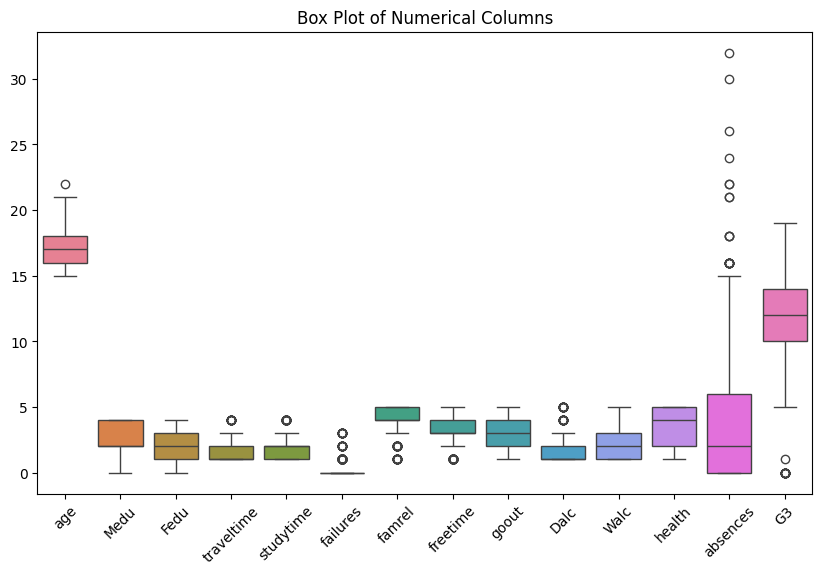

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Columns')
plt.show()

In [29]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].median())

In [30]:
df[numerical_columns].head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,18,4,4,2,2,0,4.0,3.0,4,1,1,3,4,11
1,17,1,1,1,2,0,5.0,3.0,3,1,1,3,2,11
2,15,1,1,1,2,0,4.0,3.0,2,2,3,3,6,12
3,15,4,2,1,3,0,3.0,2.0,2,1,1,5,0,14
4,16,3,3,1,2,0,4.0,3.0,2,1,2,5,0,13


In [31]:
df[categorical_columns].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,KEC,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,KEC,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,KEC,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,KEC,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,KEC,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no


#Visual Inspection: Create visualizations like histograms or QQ plots (Quantile-Quantile plots) to visually assess the distribution of your numerical data. A histogram can show the shape of the data distribution, while a QQ plot compares the quantiles of your data against those expected from a normal distribution. A linear pattern in a QQ plot suggests the data in normally distributed.

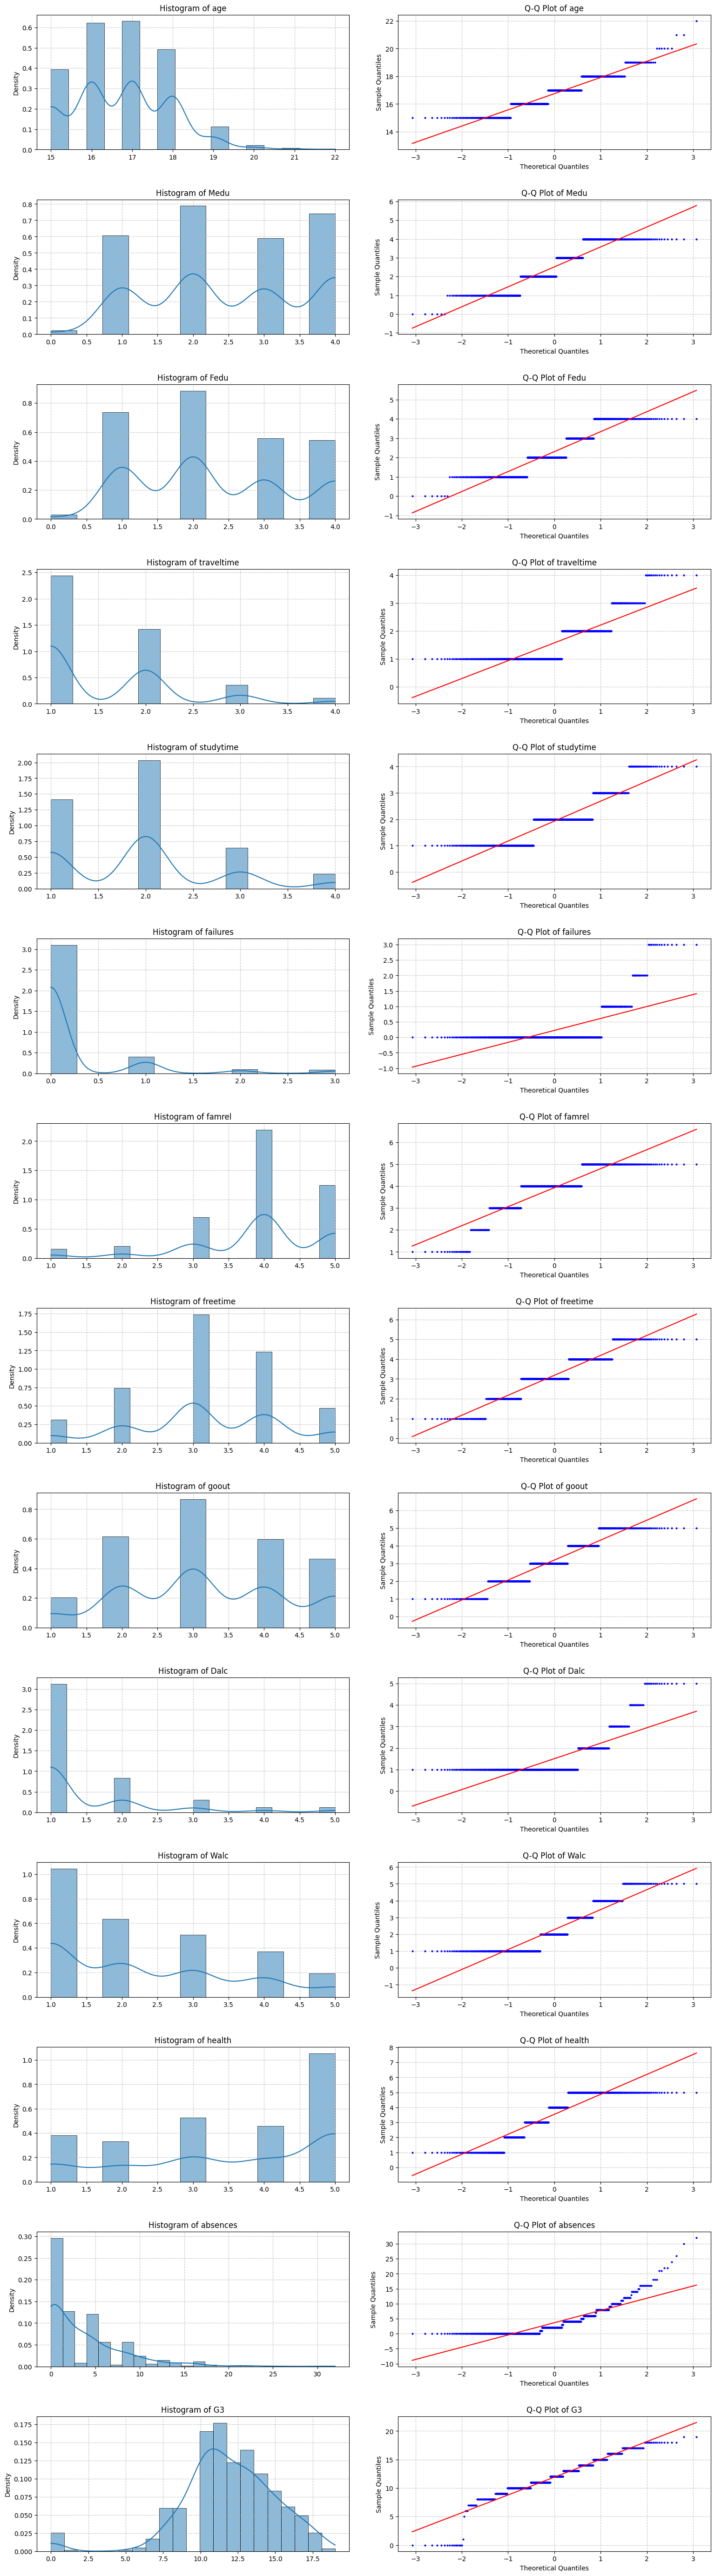

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

# Create a figure and axes for subplots
num_cols = len(numerical_columns)
fig,axes = plt.subplots(num_cols,2,figsize=(16,num_cols*4))

# Plotting histograms and Q-Q plots for each numerical column
for i , col in enumerate(numerical_columns):
    # Histogram on the Left subplot
    sns.histplot(df[col],kde=True,ax=axes[i,0],stat='density',linewidth=0.5)
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel('')
    axes[i,0].set_ylabel('Density')
    axes[i,0].grid(True,linestyle='--',alpha=0.7)

    # Q-Q Plot on the Right subplot
    stats.probplot(df[col],dist='norm',plot=axes[i,1],fit=True)
    axes[i,1].get_lines()[0].set_markersize(2.0)
    axes[i,1].grid(True,linestyle='--', alpha=0.7)
    axes[i,1].set_title(f'Q-Q Plot of {col}')
    axes[i,1].set_xlabel('Theoretical Quantiles')
    axes[i,1].set_ylabel('Sample Quantiles')

# Adjust Layout and display the plots
plt.tight_layout(pad=3.0)
plt.show()

#Statistical Tests: Use statistical methods such as the Shapiro-Wilk test or Kolmogorov-Smirnov test. These tests evaluate whether a sample of data comes from a normal distribution. If the p-values from these tests is greater than a chosen significance level (e.g., 0.05), it suggests that the data may follow a normal distribution.

#Descriptive Statistics: Calculate Descriptive statistics such as mean, median and standard deviation. For normally distributed data, the mean and median are typically close in value, and about 68% of the data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson, jarque_bera,shapiro,normaltest,kstest
from statsmodels.stats.diagnostic import lilliefors

# Function to perform normality tests
def test_normality(df,col):
  print(f'Column: {col}')

  # Shapiro-Wilk test
  stat_shapiro, p_shapiro = shapiro(df[col])
  print(f'Shapiro-Wilk Test: Statistic={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
  if p_shapiro > 0.05:
    print(f'Shapiro-Wilk Test: {col} looks normally distributed (fail to reject H0)')
  else:
    print(f'Shapiro-Wilk Test: {col} does not look normally distributed (reject H0)')

  # Anderson-Darling test
  result_anderson = anderson(df[col])
  print(f'Anderson-Darling Test: Statistic={result_anderson.statistic:.3f}')
  print(f'Anderson-Darling Test: Critical Values:{result_anderson.critical_values}')
  if result_anderson.statistic < result_anderson.critical_values[2]:
    print(f'Anderson-Darling Test: {col} looks normally distributed (fail to reject H0)')
  else:
    print(f'Anderson-Darling Test: {col} does not look normally distributed (reject H0)')

  # Jarque-Bera test
  jb_stat, p_val_jb = jarque_bera(df[col])
  print(f'Jarque-Bera Test: Statistic={jb_stat:.3f}, p-value={p_val_jb:.3f}')
  if p_val_jb > 0.05:
    print(f'Jarque-Bera Test: {col} looks normally distributed (fail to reject H0)')
  else:
    print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')

  # D'Agostino and Pearson's test
  stat_agostino, p_agostino = normaltest(df[col])
  print(f"D/Agostino and Pearson's Test: Statistics={stat_agostino:.3f},p-value={p_agostino}")
  if p_agostino > 0.05:
    print(f"D'Agostino and Pearson's Test: {col}looks normally distributed (fail to reject H0)")
  else:
    print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed (reject H0)")

  # Kolmogorov-Smirnov test
  ks_stat, p_ks = kstest(df[col], 'norm')
  print(f'Kolmogorov-Smirnov Test: Statistic={ks_stat:.3f}, p-value={p_ks:.3f}')
  if p_ks > 0.05:
    print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed (fail to reject H0)')
  else:
    print(f'Kolmogorov-Smirnov Test: {col} does not look normally distributed (reject H0)')

  # Lilliefors test
  stat_lilliefors, p_lilliefors = lilliefors(df[col])
  print(f'Lilliefors Test: Statistic={stat_lilliefors:.3f}, p-value={p_lilliefors:.3f}')
  if p_lilliefors > 0.05:
    print(f'Lilliefors Test: {col} looks normally distributed (fail to reject H0)')
  else:
    print(f'Lilliefors Test: {col} does not look normally distributed (reject H0)')
  print('\n')

# Perform normality tests for each numerical column
for col in numerical_columns:
  test_normality(df,col)


Column: age
Shapiro-Wilk Test: Statistic=0.916, p-value=0.000
Shapiro-Wilk Test: age does not look normally distributed (reject H0)
Anderson-Darling Test: Statistic=20.080
Anderson-Darling Test: Critical Values:[0.573 0.652 0.782 0.912 1.085]
Anderson-Darling Test: age does not look normally distributed (reject H0)
Jarque-Bera Test: Statistic=18.807, p-value=0.000
Jarque-Bera Test: age does not look normally distributed (reject H0)
D/Agostino and Pearson's Test: Statistics=17.922,p-value=0.0001283219921966196
D'Agostino and Pearson's Test: age does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test: Statistic=1.000, p-value=0.000
Kolmogorov-Smirnov Test: age does not look normally distributed (reject H0)
Lilliefors Test: Statistic=0.175, p-value=0.001
Lilliefors Test: age does not look normally distributed (reject H0)


Column: Medu
Shapiro-Wilk Test: Statistic=0.870, p-value=0.000
Shapiro-Wilk Test: Medu does not look normally distributed (reject H0)
Anderson-Darling Te

# Function to detect outliers using IQR method and return column-wise boolean indicators

In [34]:
def find_outliers_iqr(data):
    outliers_mask = pd.Series(index = data.columns, dtype = bool)

    for col in data.columns:
        if col in numerical_columns: #Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
            outliers_mask[col] = col_outliers_mask.any() #True if any outliers detected

    return outliers_mask

outliers_iqr_mask = find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}: {is_outlier}")

Outliers detected using IQR method:
school: True
sex: True
age: True
address: True
famsize: True
Pstatus: True
Medu: False
Fedu: False
Mjob: True
Fjob: True
reason: True
guardian: True
traveltime: True
studytime: True
failures: True
schoolsup: True
famsup: True
paid: True
activities: True
nursery: True
higher: True
internet: True
romantic: True
famrel: True
freetime: True
goout: False
Dalc: True
Walc: False
health: False
absences: True
G3: True


# Function to detect outliers using Z-score method and return column-wise boolean indicators

In [35]:
def find_outliers_zscore(data, threshold = 3):
    outliers_mask = pd.Series(index = data.columns, dtype = bool)

    for col in data.columns:
        if col in numerical_columns: #Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            col_outliers_mask = z_scores > threshold
            outliers_mask[col] = col_outliers_mask.any() #True if any outliers detected

    return outliers_mask

outliers_zscore_mask = find_outliers_iqr(df)
print("Outliers detected using Z-score method:")
for col, is_outlier in outliers_zscore_mask.items():
    print(f"{col}: {is_outlier}")

Outliers detected using Z-score method:
school: True
sex: True
age: True
address: True
famsize: True
Pstatus: True
Medu: False
Fedu: False
Mjob: True
Fjob: True
reason: True
guardian: True
traveltime: True
studytime: True
failures: True
schoolsup: True
famsup: True
paid: True
activities: True
nursery: True
higher: True
internet: True
romantic: True
famrel: True
freetime: True
goout: False
Dalc: True
Walc: False
health: False
absences: True
G3: True


# Function to remove outliers using IQR method

In [36]:
def remove_outliers_iqr(data):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns: #Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound )]
        return cleaned_data

cleaned_data_iqr = remove_outliers_iqr(df)
print("DataFrame after removing outliers using IQR method:")
print(cleaned_data_iqr)

DataFrame after removing outliers using IQR method:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      KEC   F   18       U     GT3       A     4     4   at_home   teacher   
1      KEC   F   17       U     GT3       T     1     1   at_home     other   
2      KEC   F   15       U     LE3       T     1     1   at_home     other   
3      KEC   F   15       U     GT3       T     4     2    health  services   
4      KEC   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644    KEC   F   19       R     GT3       T     2     3  services     other   
645    KEC   F   18       U     LE3       T     3     1   teacher  services   
646    KEC   F   18       U     GT3       T     1     1     other     other   
647    KEC   M   17       U     LE3       T     3     1  services  services   
648    KEC   M   18       R     LE3       T     3     2  services     other   


# Function to remove outliers using Z-score method

In [37]:
def remove_outliers_zscore(data, threshold = 3):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns: #Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            cleaned_data = cleaned_data[z_scores <= threshold]

    return cleaned_data

cleaned_data_zscore = remove_outliers_zscore(df)
print("DataFrame after removing outliers using Z-score method:")
print(cleaned_data_zscore)

DataFrame after removing outliers using Z-score method:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      KEC   F   18       U     GT3       A     4     4   at_home   teacher   
1      KEC   F   17       U     GT3       T     1     1   at_home     other   
2      KEC   F   15       U     LE3       T     1     1   at_home     other   
3      KEC   F   15       U     GT3       T     4     2    health  services   
4      KEC   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
643    KEC   F   18       R     GT3       T     4     4   teacher   at_home   
644    KEC   F   19       R     GT3       T     2     3  services     other   
645    KEC   F   18       U     LE3       T     3     1   teacher  services   
647    KEC   M   17       U     LE3       T     3     1  services  services   
648    KEC   M   18       R     LE3       T     3     2  services     other

<ipython-input-37-d71c8da9646e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
<ipython-input-37-d71c8da9646e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
<ipython-input-37-d71c8da9646e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
<ipython-input-37-d71c8da9646e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
<ipython-input-37-d71c8da9646e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
<ipython-input-37-d71c8da9646e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
<ipython-input-3

# Exploytary Data Analysis

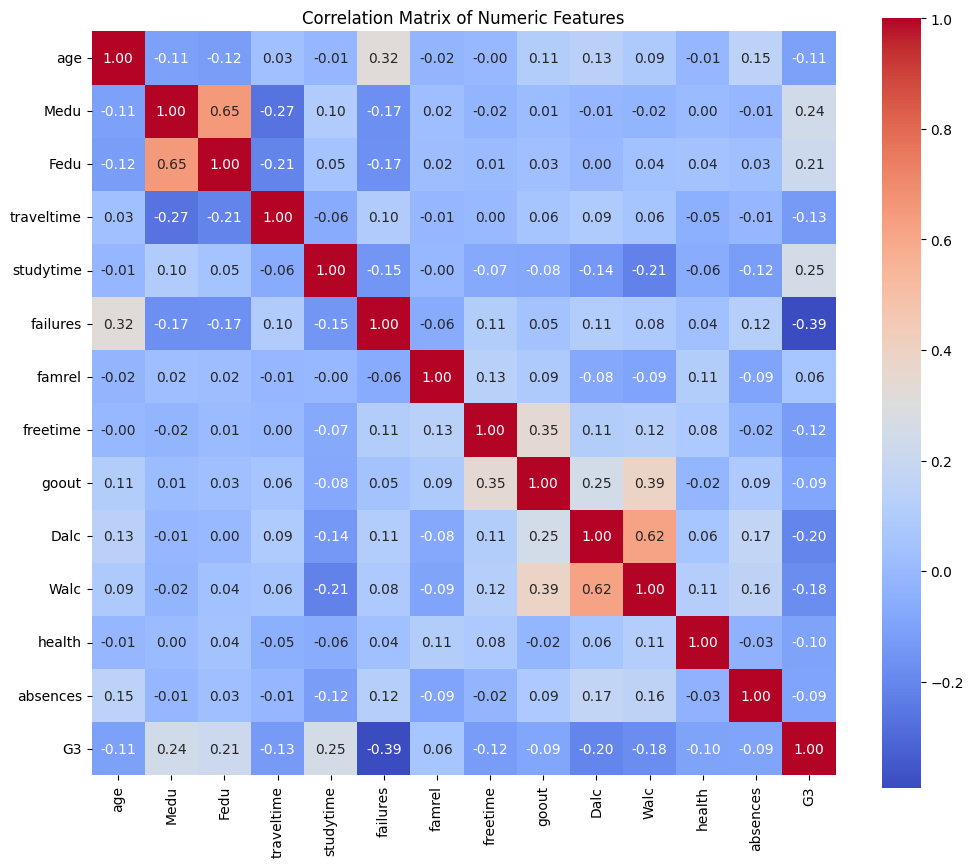

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = df[numerical_columns]

# Compute pairwise correlation of numeric columns
correlation_matrix = numeric_data.corr()

# Plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f",square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Pairplot of numeric features

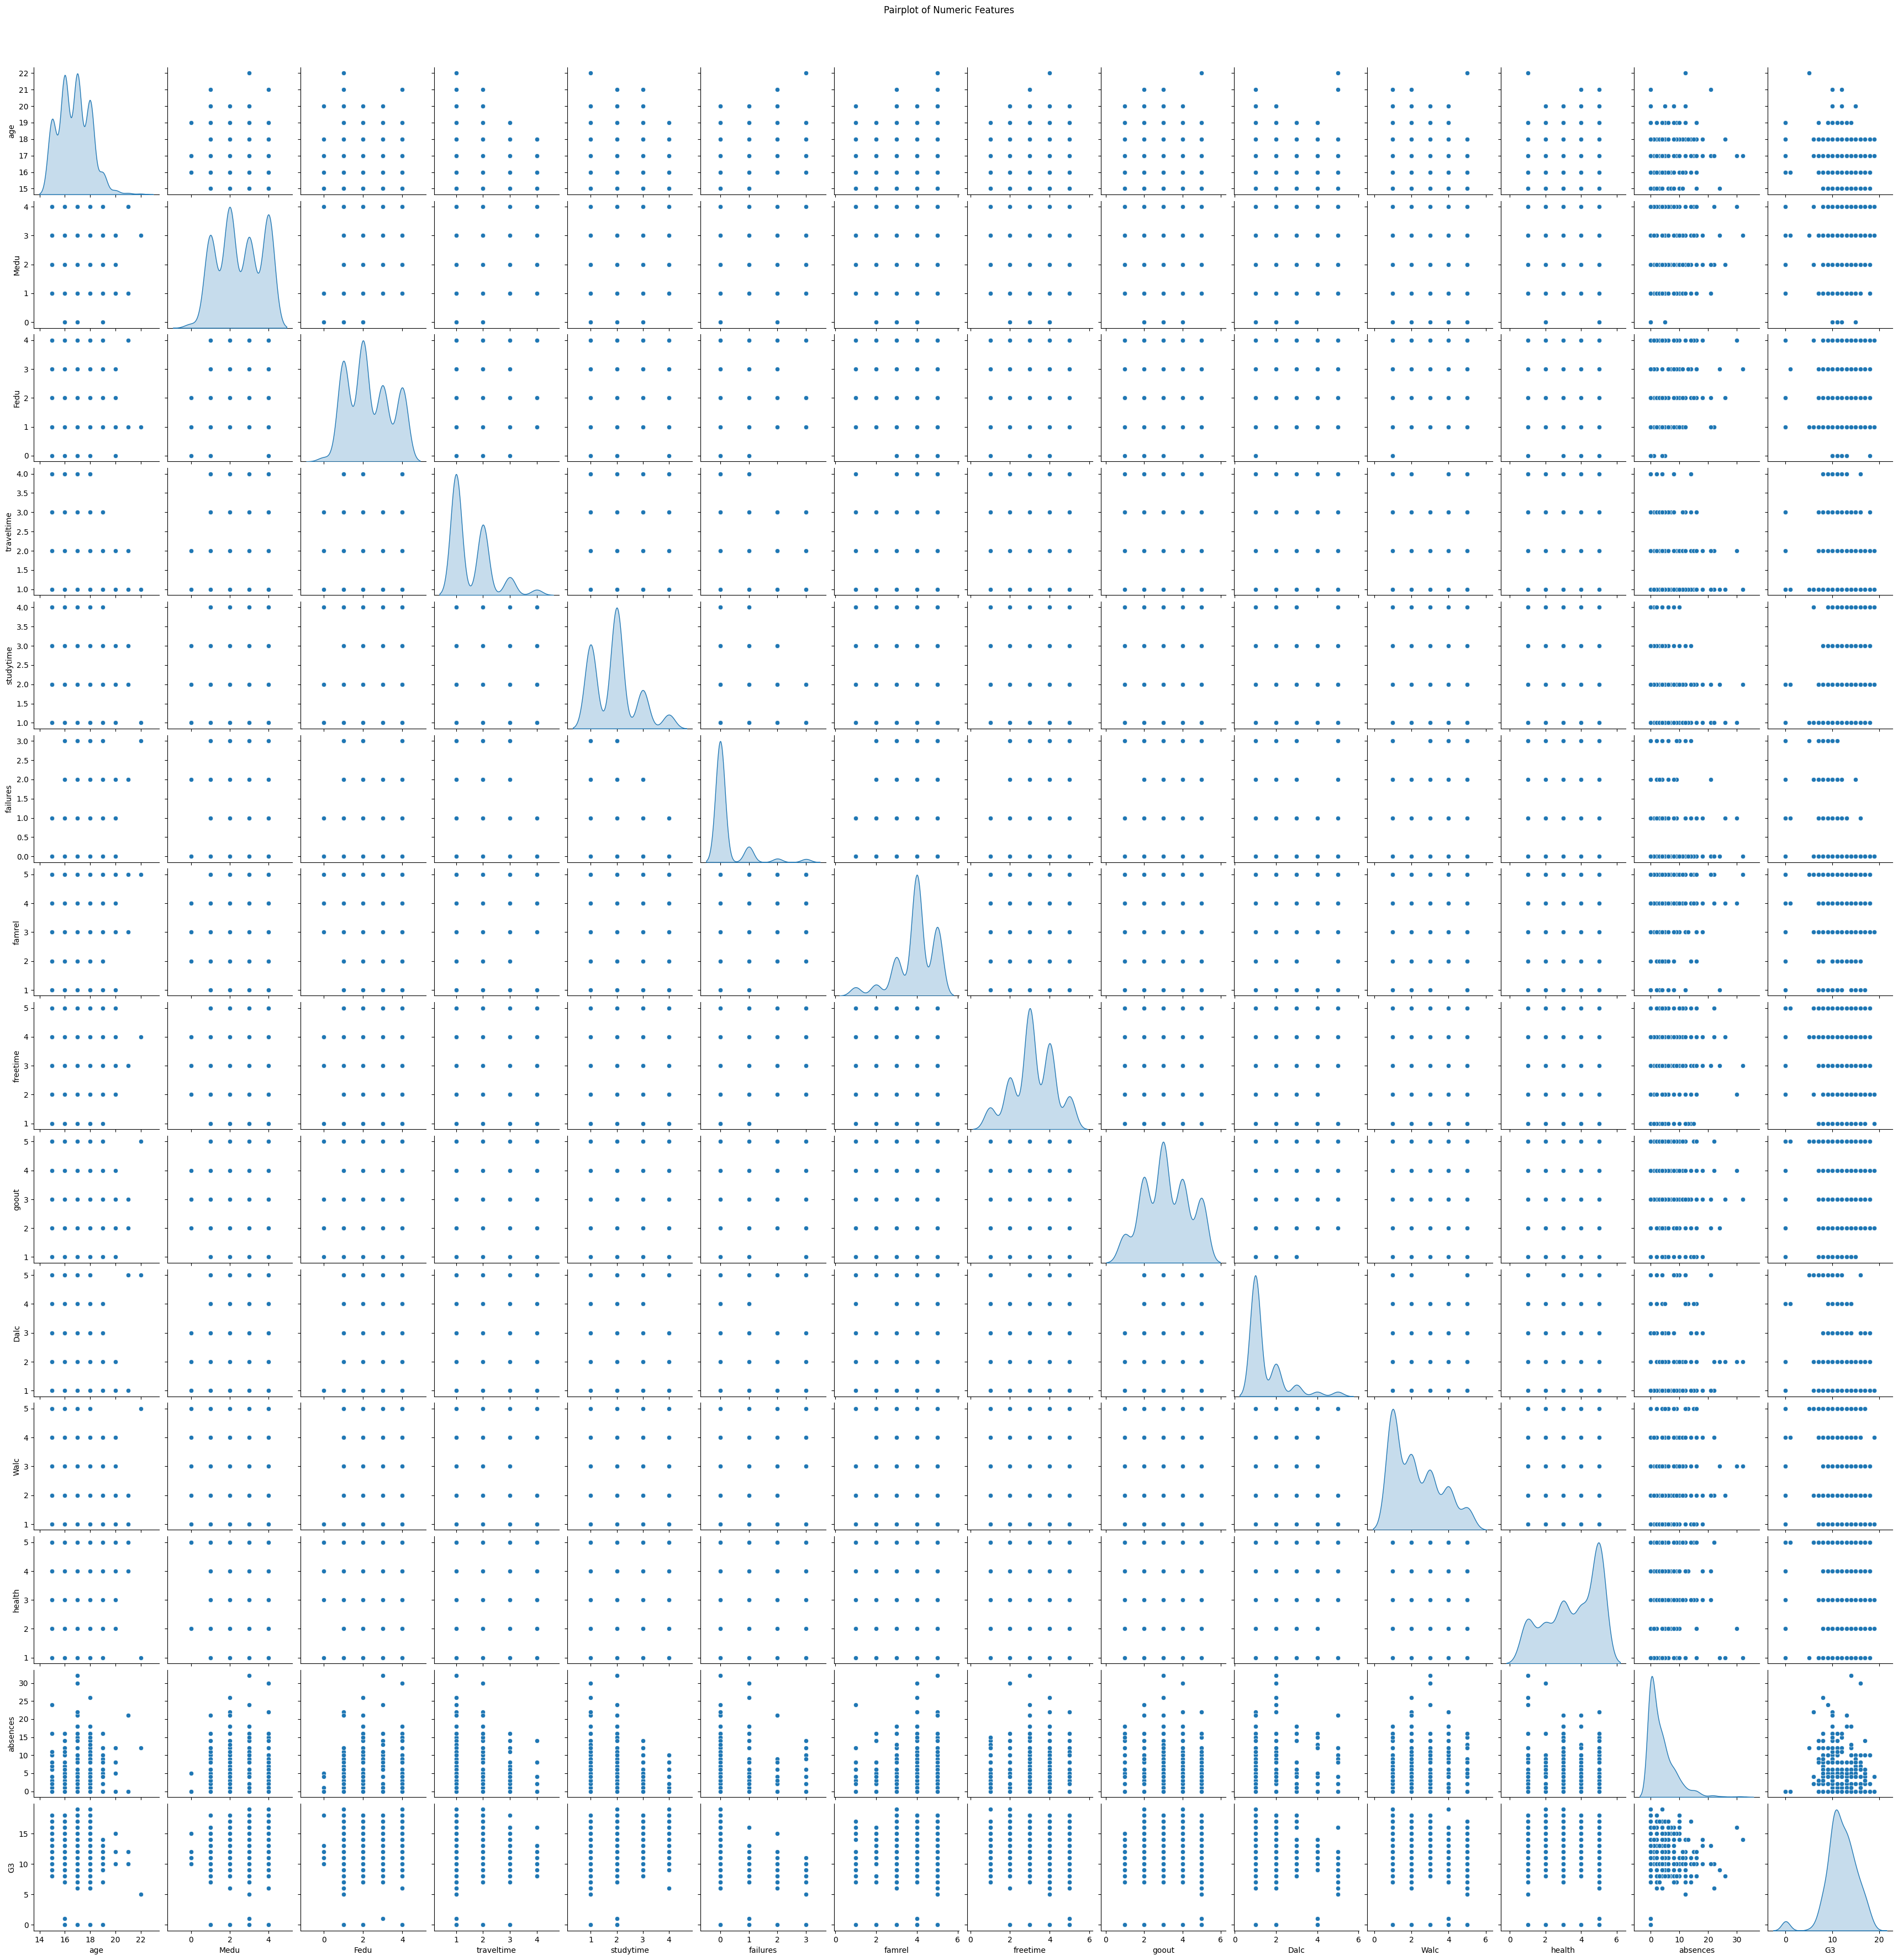

In [39]:
sns.pairplot(df[numerical_columns],diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features',y=1.02)
plt.show()

In [40]:
print(list(df.columns))

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']


In [41]:
df['GPA'] = df['G3']/5 # Since G3 ranges from 0 to 20
# Create new column 'pass/fail' based on GPA condition
df['pass/fail'] = df['G3'].apply(lambda x: 'pass' if x >= 12 else 'fail')

In [42]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA,pass/fail
0,KEC,F,18,U,GT3,A,4,4,at_home,teacher,...,4.0,3.0,4,1,1,3,4,11,2.2,fail
1,KEC,F,17,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3,1,1,3,2,11,2.2,fail
2,KEC,F,15,U,LE3,T,1,1,at_home,other,...,4.0,3.0,2,2,3,3,6,12,2.4,pass
3,KEC,F,15,U,GT3,T,4,2,health,services,...,3.0,2.0,2,1,1,5,0,14,2.8,pass
4,KEC,F,16,U,GT3,T,3,3,other,other,...,4.0,3.0,2,1,2,5,0,13,2.6,pass


In [43]:
df['pass/fail'].value_counts()

,count
pass/fail,
pass,348
fail,301


In [44]:
df.shape

(649, 33)

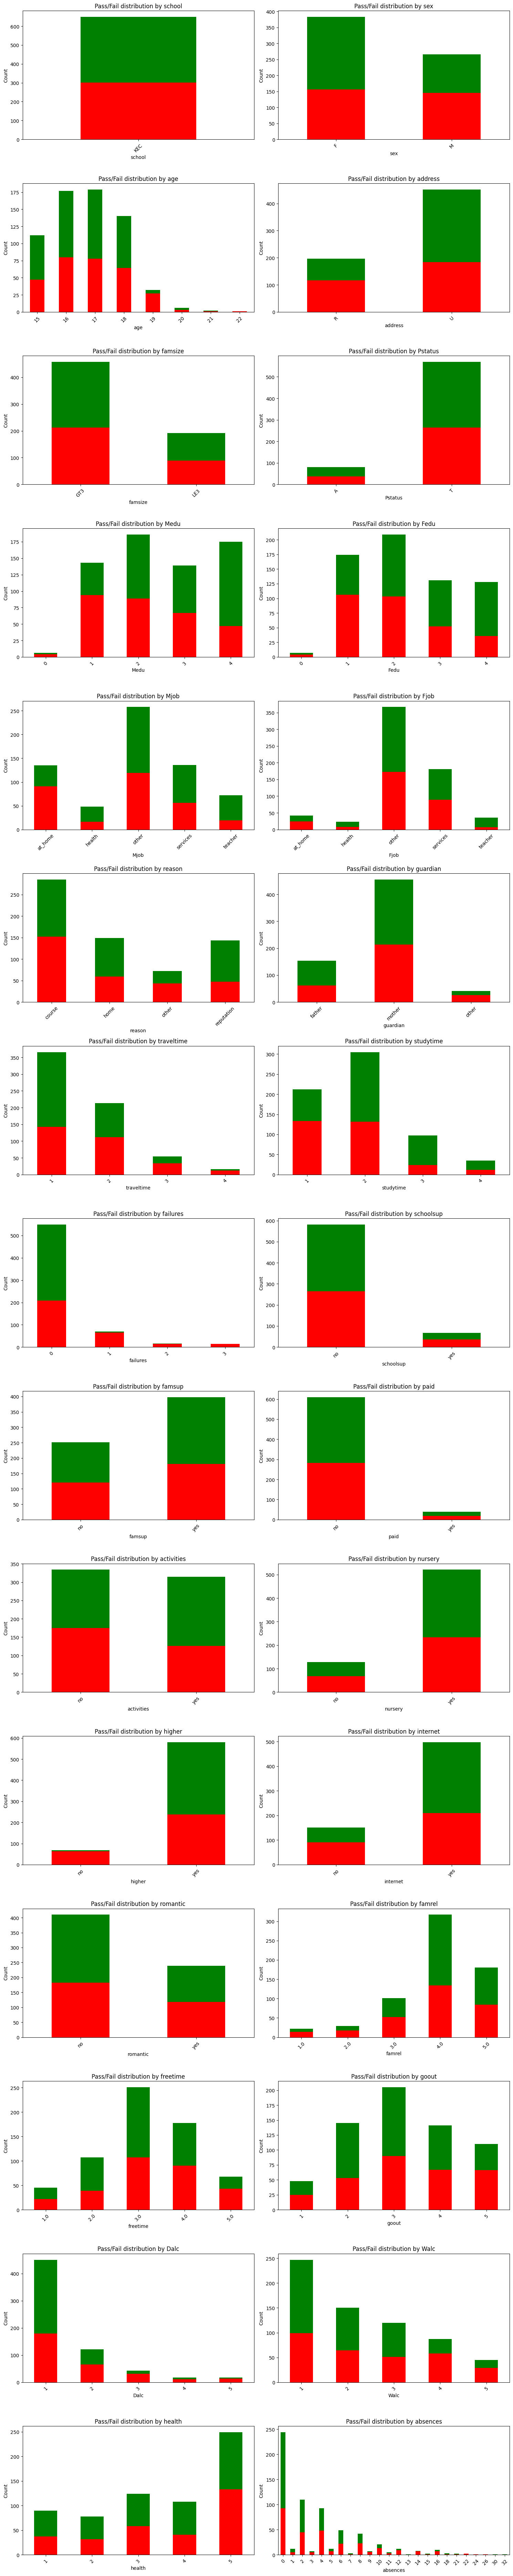

In [45]:
import matplotlib.pyplot as plt
import pandas as pd


# Assuming df, pass/fail column, and GPA columns are already defined as per your previous discussions

# Exclude and columns that are not needed for plotting
columns_to_plot = [col for col in df.columns if col not in ['pass', 'G3', 'pass/fail', 'GPA']]

# Calculate number of rows and columns for subplot grid
num_cols = 2 # Number of columns in subplot layout
num_rows = (len(columns_to_plot)+1)// num_cols

# Adjust figure size based on number of subplots
fig_width = 15
fig_height = num_rows * 5 # Adjust height based on number of rows

plt.figure(figsize=(fig_width, fig_height))

# Iterate through each column and plot
for i , col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i+1)
    pass_fail_cross = pd.crosstab(index=df[col],columns=df['pass/fail'])
    pass_fail_cross.plot(kind='bar',stacked = True, color=['red','green'], ax=plt.gca(),legend = None)
    plt.title(f'Pass/Fail distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout(pad=3.0)


plt.tight_layout()
plt.show()


In [46]:
# Iterate through each column
for column in df.columns:
  # Get unique values in the column
  unique_values = df[column].unique()

  # Print the column name and its unique values
  print(f"Unique Values in {column} column: {unique_values}")
  print()


Unique Values in school column: ['KEC']

Unique Values in sex column: ['F' 'M']

Unique Values in age column: [18 17 15 16 19 22 20 21]

Unique Values in address column: ['U' 'R']

Unique Values in famsize column: ['GT3' 'LE3']

Unique Values in Pstatus column: ['A' 'T']

Unique Values in Medu column: [4 1 3 2 0]

Unique Values in Fedu column: [4 1 2 3 0]

Unique Values in Mjob column: ['at_home' 'health' 'other' 'services' 'teacher']

Unique Values in Fjob column: ['teacher' 'other' 'services' 'health' 'at_home']

Unique Values in reason column: ['course' 'other' 'home' 'reputation']

Unique Values in guardian column: ['mother' 'father' 'other']

Unique Values in traveltime column: [2 1 3 4]

Unique Values in studytime column: [2 3 1 4]

Unique Values in failures column: [0 3 1 2]

Unique Values in schoolsup column: ['yes' 'no']

Unique Values in famsup column: ['no' 'yes']

Unique Values in paid column: ['no' 'yes']

Unique Values in activities column: ['no' 'yes']

Unique Values in 

In [47]:
df.to_csv('/content/drive/MyDrive/AI_WORKSPACE/Student_Performance_Analysis/Datasets/filtered_data_student.csv',index=False)

# Data

In [48]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AI_WORKSPACE/Student_Performance_Analysis/Datasets/filtered_data_student.csv')

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA,pass/fail
0,KEC,F,18,U,GT3,A,4,4,at_home,teacher,...,4.0,3.0,4,1,1,3,4,11,2.2,fail
1,KEC,F,17,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3,1,1,3,2,11,2.2,fail
2,KEC,F,15,U,LE3,T,1,1,at_home,other,...,4.0,3.0,2,2,3,3,6,12,2.4,pass
3,KEC,F,15,U,GT3,T,4,2,health,services,...,3.0,2.0,2,1,1,5,0,14,2.8,pass
4,KEC,F,16,U,GT3,T,3,3,other,other,...,4.0,3.0,2,1,2,5,0,13,2.6,pass


In [49]:
counts = data['pass/fail'].value_counts()
counts

,count
pass/fail,
pass,348
fail,301


In [50]:
# Display the first few rows and all columns
pd.set_option('display.max_columns',None)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA,pass/fail
0,KEC,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4,1,1,3,4,11,2.2,fail
1,KEC,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3,1,1,3,2,11,2.2,fail
2,KEC,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2,2,3,3,6,12,2.4,pass
3,KEC,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3.0,2.0,2,1,1,5,0,14,2.8,pass
4,KEC,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4.0,3.0,2,1,2,5,0,13,2.6,pass


In [51]:
data.drop(columns=['school'],axis=1,inplace=True)
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA,pass/fail
0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4,1,1,3,4,11,2.2,fail
1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3,1,1,3,2,11,2.2,fail
2,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2,2,3,3,6,12,2.4,pass
3,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3.0,2.0,2,1,1,5,0,14,2.8,pass
4,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4.0,3.0,2,1,2,5,0,13,2.6,pass


In [52]:
numerical_cols = data.select_dtypes(exclude=['category','object']).columns
category_cols=data.select_dtypes(include=['category','object']).columns

In [53]:
numerical_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3', 'GPA'],
      dtype='object')

In [54]:
category_cols

Index(['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'pass/fail'],
      dtype='object')

In [55]:
for col in category_cols:
  unique_values=data[col].unique()
  print(f'Unique values in {col} column: {unique_values}')
  for value in unique_values:
    print(value)
  print()

Unique values in sex column: ['F' 'M']
F
M

Unique values in address column: ['U' 'R']
U
R

Unique values in famsize column: ['GT3' 'LE3']
GT3
LE3

Unique values in Pstatus column: ['A' 'T']
A
T

Unique values in Mjob column: ['at_home' 'health' 'other' 'services' 'teacher']
at_home
health
other
services
teacher

Unique values in Fjob column: ['teacher' 'other' 'services' 'health' 'at_home']
teacher
other
services
health
at_home

Unique values in reason column: ['course' 'other' 'home' 'reputation']
course
other
home
reputation

Unique values in guardian column: ['mother' 'father' 'other']
mother
father
other

Unique values in schoolsup column: ['yes' 'no']
yes
no

Unique values in famsup column: ['no' 'yes']
no
yes

Unique values in paid column: ['no' 'yes']
no
yes

Unique values in activities column: ['no' 'yes']
no
yes

Unique values in nursery column: ['yes' 'no']
yes
no

Unique values in higher column: ['yes' 'no']
yes
no

Unique values in internet column: ['no' 'yes']
no
yes

Uni

In [56]:
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA,pass/fail
0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4,1,1,3,4,11,2.2,fail
1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3,1,1,3,2,11,2.2,fail
2,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2,2,3,3,6,12,2.4,pass
3,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3.0,2.0,2,1,1,5,0,14,2.8,pass
4,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4.0,3.0,2,1,2,5,0,13,2.6,pass


In [57]:
# Drop numerical columns from data
data_categorical = data.drop(columns=numerical_cols)

# Perform one-hot encoding on categorical columns
encoded_data = pd.get_dummies(data_categorical, columns=['sex','address','famsize','Pstatus','Mjob','Fjob','reason',
                                                         'guardian','schoolsup','famsup','paid','activities','nursery',
                                                         'higher','internet','romantic'])

In [58]:
encoded_data.head()

,pass/fail,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,fail,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False
1,fail,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False
2,pass,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False
3,pass,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True
4,pass,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False


from sklearn.preprocessing import OneHotEncoder

# Drop numerical columns from the data

data_categorical = data.drop(columns=numerical_cols)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False,drop='first')
columns=['sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid', 'activities','nursery','higher','internet','romantic']

# Fit and transform the categorical columns
encoded_data=encoder.fit_transform(data_categorical[columns])

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming encoded_data is already created from one-hot encoding
# numerical_cols should be defined earlier as numerical columns from your dataset

# Pipeline for numerical columns
numerical_pipeline = Pipeline([('scaler',StandardScaler())])

# Transform numerical columns
numerical_data=numerical_pipeline.fit_transform(data[numerical_cols])

# Convert transformed numerical data back to DataFrame
numerical_data_df = pd.DataFrame(numerical_data, columns=numerical_cols)

# Combine numerical and categorical dta
final_data = pd.concat([encoded_data,numerical_data_df],axis=1)

# now final_data contains all your processed data ready for modeling
final_data.head()

,pass/fail,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA
0,fail,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-0.280658,-0.280658
1,fail,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.280658,-0.280658
2,pass,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.029116,0.029116
3,pass,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.648663,0.648663
4,pass,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,0.338889,0.338889


In [60]:
final_data.columns

Index(['pass/fail', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G3', 'GPA'],
      dtype='object')

# Logistic Regression

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_recall_curve,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib # For saving the model

In [62]:
# Extract features (X) and target variable (y)
X=final_data.drop('pass/fail',axis=1)
y=final_data['pass/fail']

# Convert target variable to numerical (0 and 1)
y = y.map({'fail':0,'pass':1})
# Split Data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train,y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

In [66]:
model_path = '/content/drive/MyDrive/AI_WORKSPACE/Student_Performance_Analysis/ML_MODEL/decision_tree_model.pkl'
joblib.dump(model,model_path)

['/content/drive/MyDrive/AI_WORKSPACE/Student_Performance_Analysis/ML_MODEL/decision_tree_model.pkl']

In [67]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

In [68]:
from sklearn import tree
import matplotlib.pyplot as plt

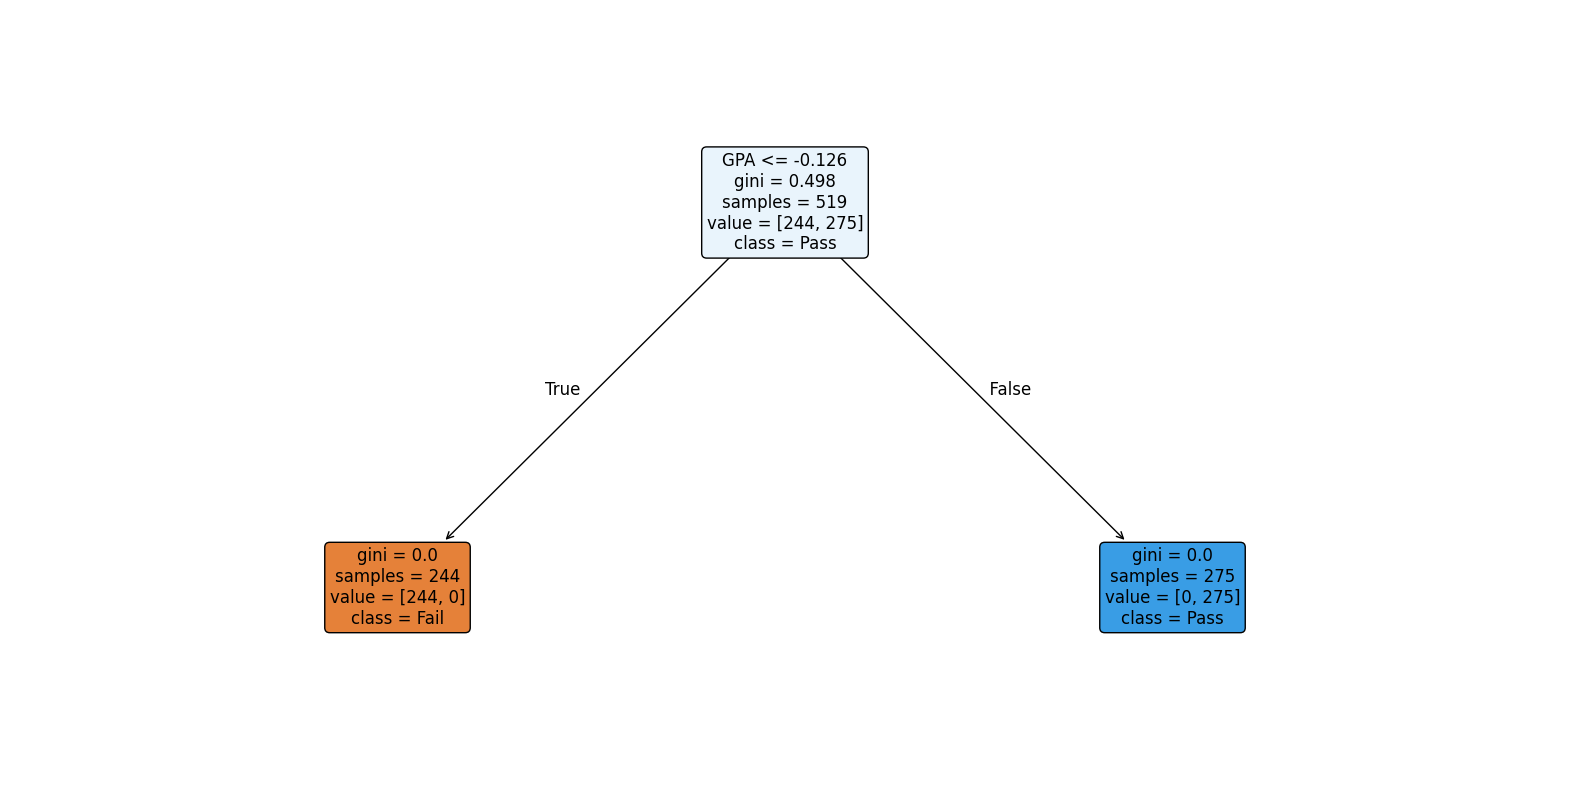

In [69]:
plt.figure(figsize=(20,10))
tree.plot_tree(model,
              feature_names=X.columns,
              class_names=['Fail','Pass'],
               filled=True,
               rounded=True,
               fontsize=12
              )
plt.show()

In [70]:
## Calculate the ROC curve and AUC score for test set
y_prob=model.predict_proba(X_test)[:,1]    ## probability of th set class
fpr,tpr,roc_thresholds=roc_curve(y_test,y_prob)
auc=roc_auc_score(y_test,y_prob)

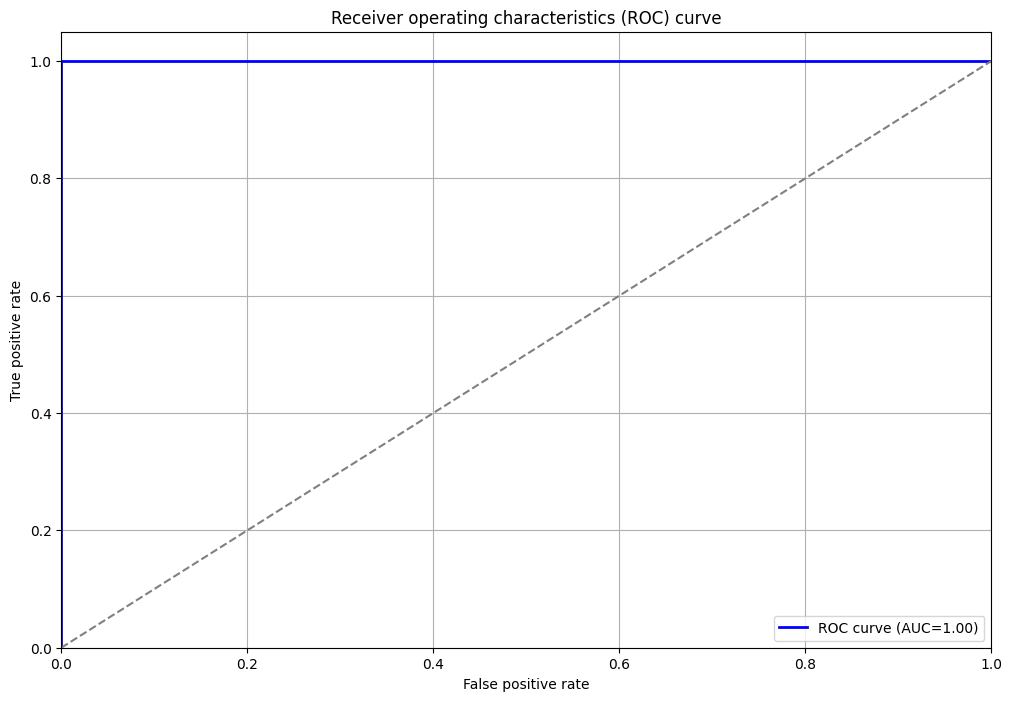

In [71]:
##Plot the ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC curve (AUC={auc:.2f})')
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating characteristics (ROC) curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

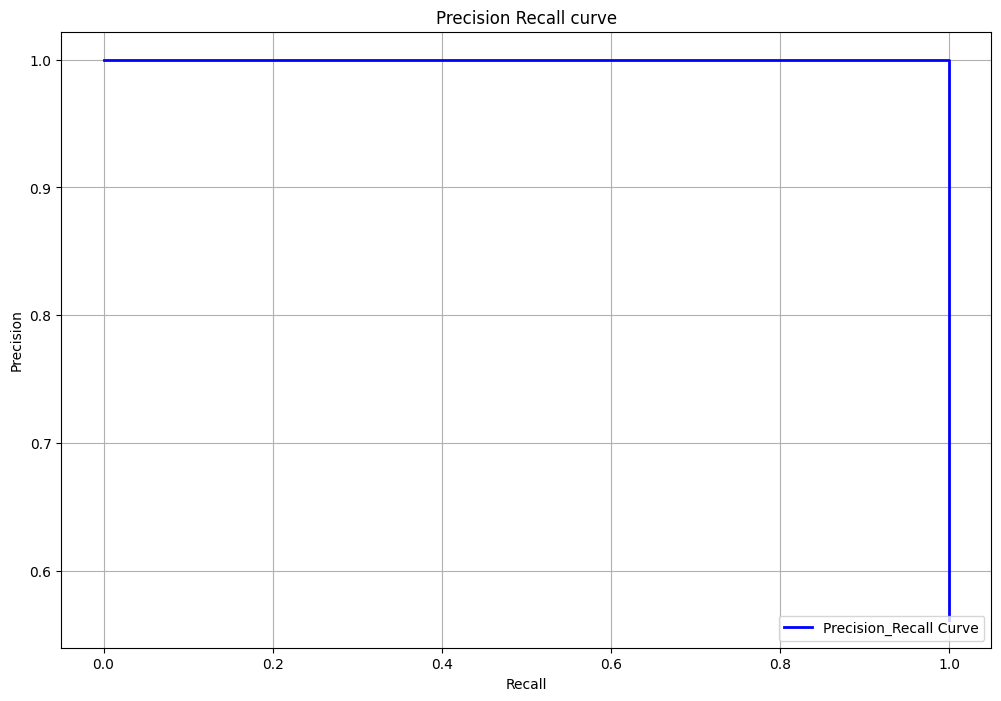

In [72]:
## Calculate precision-Recall curve and f1 score curve for test set
precision,recall,pr_thresholds=precision_recall_curve(y_test,y_prob)
f1_scores=2*(precision*recall)/(precision+recall)

##Plot precision recall curve
plt.figure(figsize=(12,8))
plt.plot(recall,precision,color='blue',lw=2,label='Precision_Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

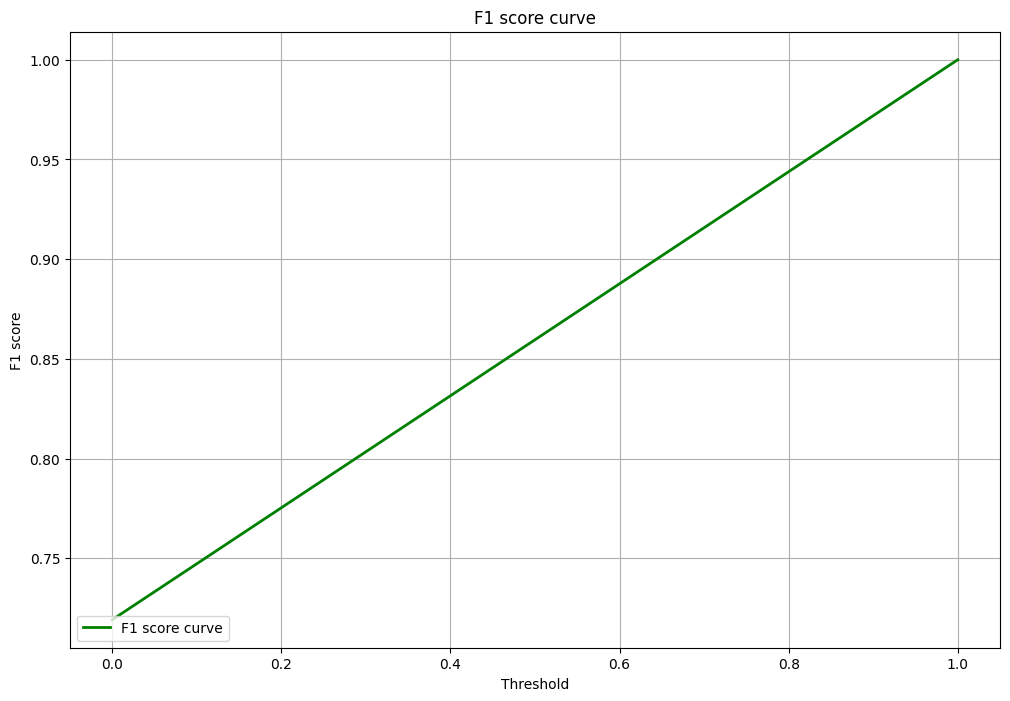

In [73]:
plt.figure(figsize=(12,8))
plt.plot(pr_thresholds,f1_scores[:-1],color='green',lw=2,label='F1 score curve')
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1 score curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import os
import joblib

In [75]:
model=GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [77]:
model_path='/content/drive/MyDrive/AI_WORKSPACE/Ml_project/ML_MODELS/gaussian_naive_bayes_model.pkl'
joblib.dump(model,model_path)
print(f'model saved at {model_path}')

model saved at /content/drive/MyDrive/AI_WORKSPACE/Ml_project/ML_MODELS/gaussian_naive_bayes_model.pkl


In [78]:
y_prob=model.predict_proba(X_test)[:,1]    ## probability of th set class
fpr,tpr,roc_thresholds=roc_curve(y_test,y_prob)
auc=roc_auc_score(y_test,y_prob)


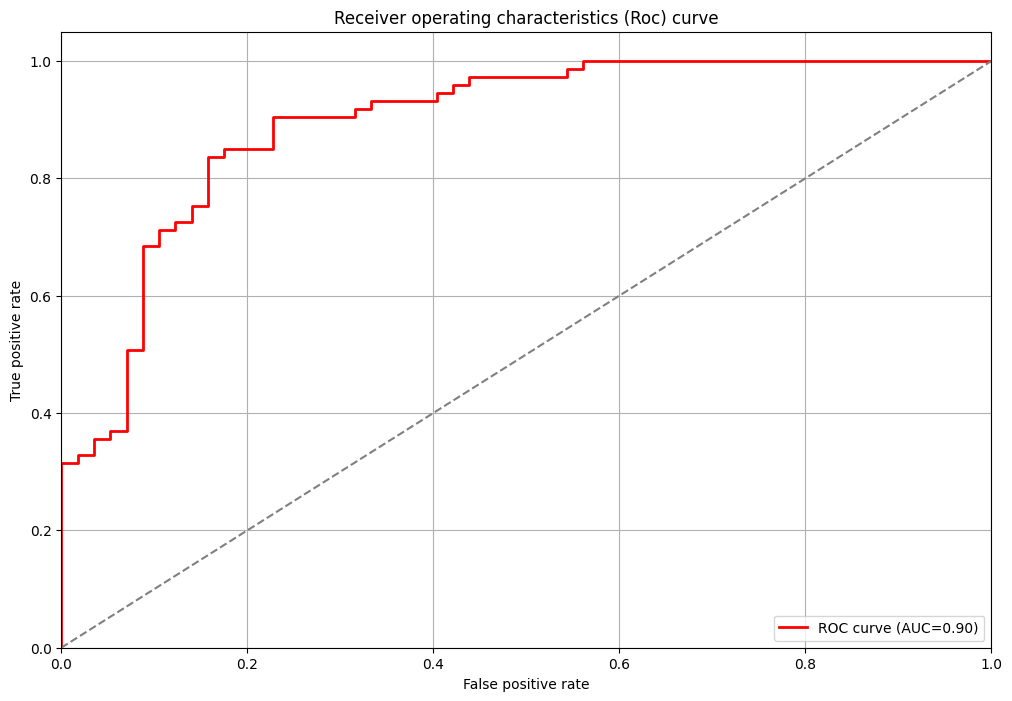

In [79]:
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,color='red',lw=2,label=f'ROC curve (AUC={auc:.2f})')
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating characteristics (Roc) curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

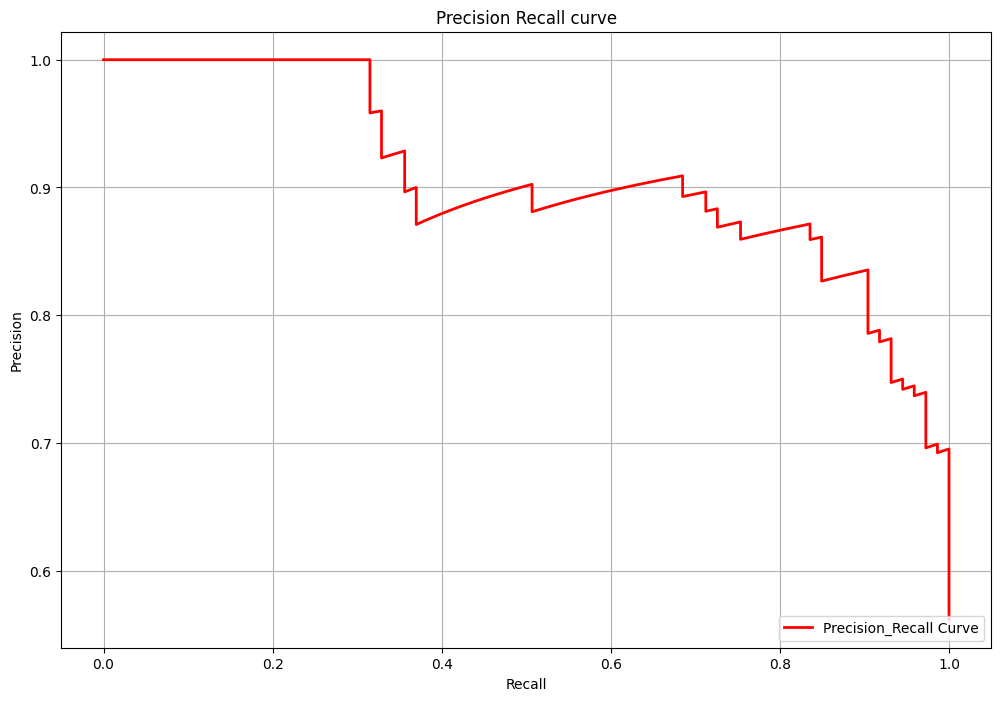

In [80]:
## Calculate precision-Recall curve and f1 score curve for test set
precision,recall,pr_thresholds=precision_recall_curve(y_test,y_prob)
f1_scores=2*(precision*recall)/(precision+recall)

##Plot precision recall curve
plt.figure(figsize=(12,8))
plt.plot(recall,precision,color='red',lw=2,label='Precision_Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Support Vector Machine

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

In [82]:
# Initialize SVM classifier
model = SVC(kernel='rbf',random_state=42,probability=True)

# Train the model
model.fit(X_train,y_train)

SVC(probability=True, random_state=42)

In [83]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate confusion matrix for test set
cm = confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix:")
print(cm)


Training Accuracy: 0.9942196531791907
Testing Accuracy: 0.9538461538461539
Confusion Matrix:
[[55  2]
 [ 4 69]]


In [84]:
model_path = '/content/drive/MyDrive/AI_WORKSPACE/Ml_project/ML_MODELS/svm_model.pkl'
joblib.dump(model,model_path)

['/content/drive/MyDrive/AI_WORKSPACE/Ml_project/ML_MODELS/svm_model.pkl']

In [86]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN classifier
model = KNeighborsClassifier()

# Fit the model
model.fit(X_train,y_train)

KNeighborsClassifier()

Training Accuracy: 0.8978805394990366
Testing Accuracy: 0.7846153846153846
Confusion Matrix:
[[36 21]
 [ 7 66]]


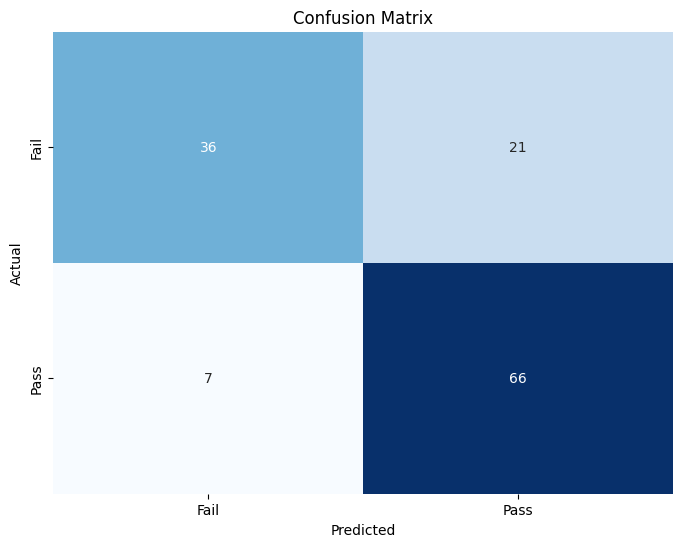

In [88]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate confusion matrix for test set
cm = confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Fail','Pass'],yticklabels=['Fail','Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

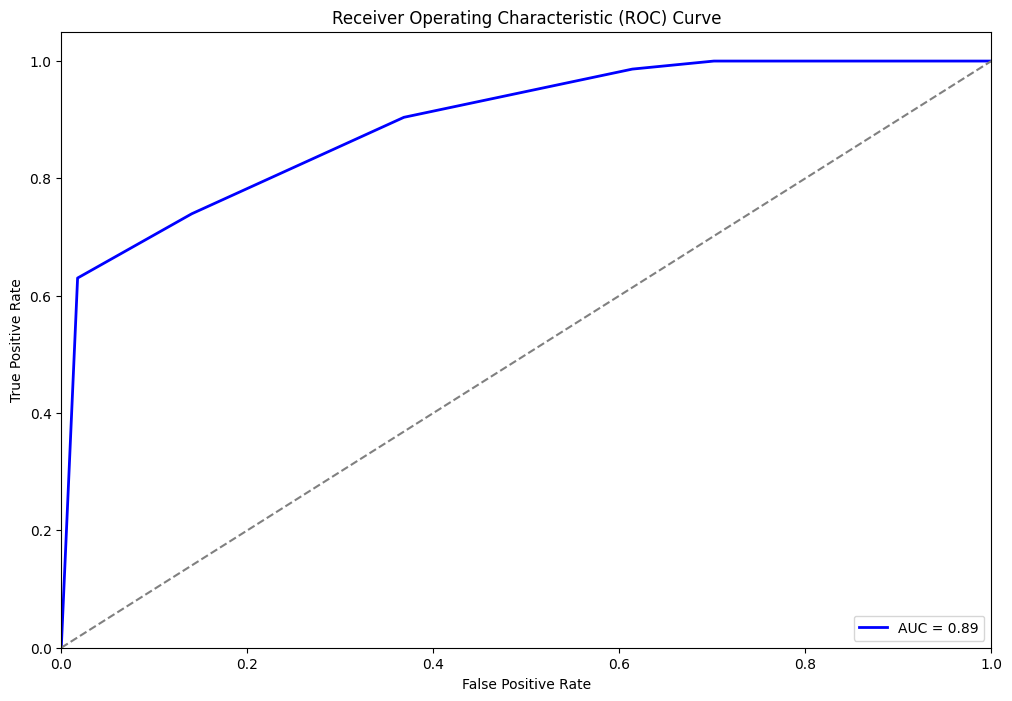

In [90]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_prob)
auc = roc_auc_score(y_test,y_prob)

# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr, color='blue',lw=2,label=f'AUC = {auc:.2f}')
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.show()

#MLP Classifier

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score


In [93]:
# Initialize MLP classifier
model = MLPClassifier(hidden_layer_sizes=(100,50),max_iter=500,random_state=42)

# Train the model
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)